### Linear Transformation using PyTorch nn.Linear module
Open this in [Google Colab](https://colab.research.google.com/github/rashlab/AI-Notes/blob/nn.Linear/nn.Linear.ipynb)
[PyTorch reference](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) CLASS ``` torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None) ``` 

nn.Linear applies a linear transformation to the incoming data: 
### **y = xA^T + b**
where:
* **x** is the input tensor
* **y** is the output tensor, which represents the transformed input tensor after applying the linear transformation
* **A** is a weight matrix automatically generated by PyTorch
* **A^T** is the Transpose of A. The Transpose operation is necessary because matrix multiplication requires the number of columns in the input matrix (x) to match the number of rows in A
* **b** is the bias tensor automatically generated by PyTorch

The code in the cell below creates a basic nn.Linear layer, which transforms an input vector (x) of 5 features to an output vector (y) of 3 features.
in this example, PyTorch generated a weight matrix (A) of (3, 5) and a bias vector (b) of (3). 
- the number of rows of A = number of output features of the layer (3)
- the number of columns of A = number of input features of the layer (5)

In [371]:
# basic nn.Linear example
import torch
import torch.nn as nn

m = nn.Linear(5, 3)
input = torch.randn(5)
output = m(input)
print(output.size())

torch.Size([3])


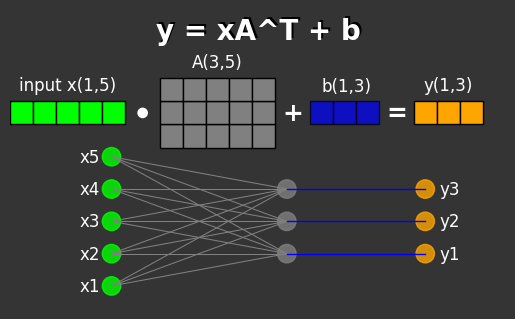

In [372]:
# visual plot of a basic linear transformation example using matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()
background_color = "#343434"
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.text(0.5*1.008, 0.9*1.008, "y = xA^T + b", fontsize=20, fontweight='bold', color='#000', ha='center',transform=ax.transAxes) 
ax.text(0.5, 0.9, "y = xA^T + b", fontsize=20, fontweight='bold', color='white', ha='center',transform=ax.transAxes) 

# ********** plot the neurons ************ 
input_size = 5
output_size = 3
circle_radius = 0.02
circle_y_offset = 1.5
circle_center_y = 0.07
output_offset = (input_size - output_size) * circle_center_y / 2
left_offset = 0.22
left_offset2 = 0.6
left_offset3 = 0.9

# Draw input neurons
for i in range(input_size):
    circle = plt.Circle((left_offset, i * circle_center_y), circle_radius, fill=True, color='lime', alpha=0.8)      
    ax.add_patch(circle)
    ax.text(left_offset - 0.07, i * circle_center_y, f'x{i+1}', fontsize=12, color='white', verticalalignment='center')

# Draw neurons after dot product
for i in range(output_size):
    circle = plt.Circle((left_offset2, i * circle_center_y + output_offset), circle_radius, fill=True, color='gray', alpha=0.8)      
    ax.add_patch(circle)
    
# Draw output neurons after adding bias
for i in range(output_size):
    circle = plt.Circle((left_offset3, i * circle_center_y + output_offset), circle_radius, fill=True, color='orange', alpha=0.8)      
    ax.add_patch(circle)
    ax.text(left_offset3 + 0.03, i * circle_center_y + output_offset, f'y{i+1}', fontsize=12, color='white', verticalalignment='center')
   
# Draw connections
for i in range(input_size):
    for j in range(output_size):
        con = plt.Line2D((left_offset, left_offset2), (i * circle_center_y, j * circle_center_y + output_offset), lw=0.75, color='gray', alpha=1)
        ax.add_artist(con)

for i in range(output_size):
    con = plt.Line2D((left_offset2, left_offset3), (i * circle_center_y + output_offset, i * circle_center_y + output_offset), lw=1, color='blue', alpha=1)
    ax.add_artist(con)

# ************ plot the squares ************
square_size = 0.05
gap = 0.075
bottom_offset = .3

# Draw the 1X5 input vector x
for i in range(5):
    square = patches.Rectangle((i * square_size, bottom_offset + square_size), square_size, square_size, linewidth=1, edgecolor='black', facecolor='lime')
    ax.add_patch(square)

# Add label above the vector
ax.text(2.5 * square_size, bottom_offset + 2.5 * square_size, "input x(1,5)", fontsize=12, color='white', ha='center')

# Add a dot between the vector and the matrix
circle_radius = 0.01
circle = plt.Circle((5 * square_size + gap / 2, bottom_offset + 1.5 * square_size), circle_radius, color='white')
ax.add_artist(circle)

# Draw the 3x5 weight matrix A
for i in range(3):
    for j in range(5):
        square = patches.Rectangle(((j + 5) * square_size + gap, bottom_offset + i * square_size), square_size, square_size, linewidth=1, edgecolor='black', facecolor='gray')
        ax.add_patch(square)

# Add label above the matrix
ax.text(9 * square_size, bottom_offset + 3.5 * square_size, "A(3,5)", fontsize=12, color='white', ha='center')

# Add a plus sign 
ax.text(11.5 * square_size + gap / 2, bottom_offset + 1.5 * square_size, "+", fontsize=18, ha='center', color='white', va='center', fontweight='bold')

# Draw the 1X3 bias vector b
for i in range(3):
    square = patches.Rectangle(((i + 10) * square_size + 2 * gap, bottom_offset + square_size), square_size, square_size, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.7)
    ax.add_patch(square)

# Add label above the bias vector
ax.text(13.5 * square_size, bottom_offset + 2.65 * square_size, "b(1,3)", fontsize=12, color='white', va='center')

# Add a equal sign 
ax.text(16 * square_size + gap / 2, bottom_offset + 1.5 * square_size, "=", fontsize=18, ha='center', color='white', va='center', fontweight='bold')

# Draw the 1X3 output vector y
for i in range(3):
    square = patches.Rectangle(((i + 13) * square_size + 3 * gap, bottom_offset + square_size), square_size, square_size, linewidth=1, edgecolor='black', facecolor='orange')
    ax.add_patch(square)

# Add label above the output vector
ax.text(19 * square_size, bottom_offset + 2.5 * square_size, "y(1,3)", fontsize=12, color='white', ha='center')



ax.set_xlim(0, (20) * square_size + gap)
ax.set_ylim(-1 * square_size, 12 * square_size)
ax.set_aspect('equal', adjustable='box')

plt.axis('off')

plt.show()


In [373]:
# a more detailed implementation of the basic nn.Linear layer in PyTorch
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

In [374]:
# Initialize a linear layer with 5 input features and 3 output features 
model = MyModel(5, 3)
# Print the weights and bias. could also use params=dict(model.named_parameters())
print("Weights:\n", model.linear.weight)
print("Bias:\n", model.linear.bias)

Weights:
 Parameter containing:
tensor([[-0.3354,  0.3640,  0.4032, -0.3183,  0.3599],
        [ 0.1159, -0.2354,  0.1832,  0.1759, -0.4272],
        [ 0.1543, -0.3709,  0.0010, -0.2036, -0.3484]], requires_grad=True)
Bias:
 Parameter containing:
tensor([-0.3170, -0.2729,  0.3325], requires_grad=True)


In [375]:
input_tensor = torch.randn(1, 5)
print('input_tensor: \n', input_tensor)

input_tensor: 
 tensor([[-0.7969,  0.3182,  0.3067,  0.2146, -0.6772]])


In [376]:
# Execute forward pass and write the output tensor to TensorBoard
with torch.no_grad():
    output_tensor = model(input_tensor)
    print('output_tensor: \n', output_tensor)    

output_tensor: 
 tensor([[-0.1223, -0.0569,  0.2841]])
